# keras 기초문법

## 모델 형성하기

numpy / pandas # 데이터셋 형성하기

### keras.model.Sequential()

instance를 생성한다. 제일 먼저 이루어져야 하는 층

### model.add()

모델을 층(layer)을 쌓아가면서 구성한다.<br>

**keras.layers.Dense()** <br>

fully connected layer 를 추가한다.

- units(첫번째 인자) : <br>
    맨 앞에 쓰이는 정수값으로서 output의 갯수를 의미 <Br>
- input_dim : <br> 
    맨 앞의 layer 층에서 쓰인다. 입력데이터 X의 한 샘플에 대한 모양의 dim 을 적어주면 된다. <br>
    주로 X_train.shape[1:] 를 쓴다. (X_train 의 row(데이터 수) 가 제일 앞에 나오고 그 뒤는 데이터의 형태이기 떄문)
- activation : 활성화함수를 추가한다. <br>
    - linear : 디폴트값. 활성화 함수 없이 그냥 뉴런과 가중치의 계산 결과 그대로 출력
    - sigmoid : 주로 이진분류문제의 맨 마지막 출력층에 사용 
    - softmax : 주로 다중클래스분류의 맨 마지막 출력층에 사용되어 확률을 출력
    - relu : hidden layer 에 주로 사용되는 활성화함수<br>
- kernel_initializer="he_normal"<br>
    초기에 연결 가중치를 어떻게 초기화할지의 방법<br>
    kernel initializer 가 초기화하는 부분은 노드 전에 이어져있는 부분이다. -(이부분의 w)- node
    - he_normal/he_uniform : HE 초기화. Relu 함수와 그 변종(LeakyRelu 등) 을 위한 초기화방법<br> 
    - GlorotNormal/GlorotUniform : 글로럿 초기화. 활성화함수가 없거나, tanh/sigmoid/softmax 를 위한 초기화방법<br>
    - lecun_normal : 르쿤 초기화. SELU 를 위한 초기화방법<br>
     
 
**keras.layers.Flatten()**

input 에 대해서 1dim 의 벡터 형태의 데이터로 변환해준다.
   
- input_shape=[]<br>
    input으로 받는 데이터의 모양 (ex [28,28])
    
**keras.layers.BatchNormalization()**

배치 정규화.  입력값에 대해서 정규화를 통해 스케일과 평균을 조절해 데이터의 분포를 비슷하게 맞춰준다. <br>
주로 활성화 함수를 통과하기 전에 실행한다.<br>


   

### model.compile()

손실함수 정의 등 학습과정 설정

**optimizer**

최적화 방법

- sgd      = keras.optimizers.SGD(lr=0.001, momentum=0.9)
- momentum = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
- Adagrad  = keras.optimizers.Adagrad(lr=0.001)
- RMSprop  = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
- Adam     = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
- Adamax   = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
- Nadam    = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)<br>
@@ 이때 위에 decay(학습률이 얼마나 줄어드는지) 를 추가할 수 있다.


**loss**

손실함수. 모델 fitting 시 이걸 기준으로 최적화
 - mse : mean squared error
 - binary_crossentropy <br>
     : 이진분류를 할 떄에 corss entropy계산 <br>
     : 이진분류시 출력층 : sigmoid + 손실함수 binary cross entropy 사용
 - categorical_crossentropy <br>
     : y가 one hot incoding 이 되어있는 경우 cross entropy를 계산 (target과 output의 shape가 같아야 함) <br>
     : softmax 출력층과 같이 사용된다.
 - sparse_categorical_crossentropy <br>
     : y가 ont hot incoding 이 안되있는경우 ex1~10 의 값을 가지는 1dim vector corss entropy 계산 <br>
     : softmax 출력층과 같이 사용된다.

**metrics**

모델의 평가 기준 
 - accuracy (Calculates how often predictions equals labels) (회귀떄에는 사용불가. 의미가없음)

### model.fit()

모델학습

**첫번째 인자**

X_train

**두번째 인자**

y_train

**batch_size = 32(default)**<br>
   
학습할떄 몇개의 Sample 을 묶어서 update 할떄에 적용할지
 
**epochs =5**<br>

총 데이터를 몇번 반복해서 학습할지
       
**shuffle =True**<br>

학습하면서 set 을 random 하게 섞을지
        
**verbose = 1(default)**<br>

학습이 이루어지는 과정을 직접 볼지 안볼지 (default = 1 로 과정을 볼 수 있다.)

**validation_data(X_val,y_val)**

검증데이터를 사용한다.<br>
검증데이터 사용시 각 에포크 마다 검증데이터의 정확도도 같이 출력이 되는데, 이 경우 훈련이 잘 되고있는지를 보여줄 뿐이며 실제로 모델이 검증데이터를 학습하지는 않는다. <br>
검증데이터의 loss 가 낮아지다가 높아지기 시작하면 이는 overfitting 
 
**validation_split = 0.2**<br>
     
검증데이터를 사용하는것은 동일하지만 , 별도로 존재하는 검증데이터를 주는게 아니라 , X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용한다.<br>
역시나 훈련 자체에는 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용. validation_data 대신 사용 가능하다.

**callback = [checkpoint,earlystopping,tensorboard,lr_scheduler]**

이 부분은 아래 값들이 가능하다.

**1.keras.callbacks.ModelCheckpoint()** <br>

모델이 기준에 따라 제일 좋을떄에 저장하는 옵션

checkpoint = keras.callbacks.ModelCheckpoint() <br>
model.fit(callbacks=[checkpoint]) # 처럼 사용 <br>
- filepath<br>
    문자열. 모델 파일을 저장할 경로 <br>
- monitor='val_loss' <br>
    어떤것을 기준으로 모델을 저장할지 <br>
- verbose=0, <br>
- save_best_only=False <br>
    save_best_only는 모델의 정확도가 최고값을 갱신했을 때만 저장하도록 하는 옵션 <br>
- save_weights_only=False <br>
    true 면 모델의 가중치만 저장된다. <br>
- mode='auto'<br>
    svae_best_only True 일 경우 <br>
    min : 우리가 정한 기준의 최소값보다 낮을떄 저장 덧씌우기(loss)<br>
    max : 우리가 정한 기준의 최대값보다 높을떄 모델 덧씌워서 저장(acc)<br>
    auto : 우리가 정한 loss 에 따라 자동유추(추천!)<br> 
- period=1<br>
    체크포인트 간격 <br>

**2.keras.callbacks.EarlyStopping()** <br>

모델이 기준에 따라 더 학습되지 않는다고 판단하면 멈추는 옵션

earlystop = keras.callbacks.ModelEarlyStopping() <br>
history = model.fit(callbacks=[earlystop]) # fitting 시에 EarlyStopping 이 같이 들어간다.
- monitor='val_loss'<br>
    어떤것을 기준으로 학습을 stop 할지 결정
- min_delta=0 <br>
    우리가 정한 기준을 바탕으로 모델이 향상되었다고 판단할 최소한의 변화. min delta 미만의 절대적 변화는 향상되었다고 판단하지 않는다.
- patience=0<br>
    개선이 없다고 바로 종료하지 않고, 인내를 가지고 기다려주는 값으로 epoch 를 몇번이나 더 허용할지 결정
- verbose=0 <br>
- mode='auto'<br>
    min : 정한 기준값이 더이상 감소하지 않으면 학습이 멈춘다.(loss 와 사용)<br>
    max : 정한 기준값이 더이상 증가하지 않으면 학습이 멈춘다.(acc 와 사용)<br>
    auto : 우리가 정한 기준값에서 방향성이 자동으로 유추된다. <br>
- baseline=None <br>
    관찰하는 수량이 도달해야하는 베이스라인 값 모델이 베이스라인을 초과하는 향상을 보이지 않으면 학습이 멈춘다.
- restore_best_weights=False <br>

**3.keras.callbacks.TensorBoard()**

**4.keras.callbacks.ReduceLROnPlateau()**

학습률을 점점 줄여나가는 스케일링 옵션

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)<br>
history = model.fit(callbacks=[lr_scheduler])

- factor = 0.1<br>
    모델이 향상이 없으면 learning rate 를 얼마나 줄일지
- patience = 10<br>
    모델이 향상이 없을때 얼마나 더 지켜볼지


### model.evaluate()

**model.evaluate # 모델 평가하기**
테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가한다.

- 첫번째 인자 = X_test

- 두번쨰 인자 = y_test

- batch_size :<br>
    왜 evaluate 에 batch size 가 필요할까? 그건 계산속도를 빠르게 하기 위함이다. 묶어서 계산할뿐이라 값은 거의 차이 안난다.<br>
    The evaluate function of Model has a batch size just in order to speed-up evaluation, as the network can process multiple samples at a time, and with a GPU this makes evaluation much faster. I think the only way to reduce the effect of this would be to set batch_size to one.


### model.predict()

**model.predict() # 모델 예측하기**

- 첫번째 인자 : 예측하고자 하는 데이터 (X_input)
- 가장 높은 클래스에만 관심이 있으면 model.predict_classes 를 쓴다.
    - y_pred = model.predict_classes(X_new)<br>
      y_pred

## 모델 살펴보기

history = model.fit(X,y) 으로 fitting 해서 model 을 형성했다고 하자.

### history.history()

**fit.history**

fit = model.fit() 으로 학습시키고 나면, 이제 이 fit 에는 우리가 학습시킬때의 과정중에서 loss. accuracy(모델의 성능평가 metric 에서 지정한 기준으로) 가 어떻게 변화하였는지를 알려주는 dictionary 가 형성된다. key와 value 를 이용해서 그래프를 그려서 학습과정을 시각화할 수 있을것이다.<br>
- pd.DataFrame(fit.history).plot<br>
    - 이 명령어를 사용하면 각 epoch 별 loss,accuracy 의 변화를 살펴볼 수 있다. <br>
    - 이떄에 만일 fit에서 validation data 도 설정하였다면 이 validation set 에서의 loss/ accuracy 또한 같이 산출해준다. <br>
    - 그래프를 보면 초기에 validation에서의 accuracy/loss가 train 에 비해 더 낮아보인다. 이는 있을 수 없는일인데(fitting 이 train 에 대해서 일어나므로) 왜 이런현상이 일어나냐면, validation 의 accuracy/loss 는 epoch 가 끝난 후 측정되고, train 의 accuracy/loss 는 훈련도중에 형성이 되기떄문에, validation 의 경우는 좀 더 완벽한 모델에 대해서 평가가 되기 떄문이다.

### model.summary()

**model.summary()**<br>
우리가 정의한 모델의 구성요소/ 구조 등을 보여준다.

### model.layers()

**model.layers**<br>
우리가 쌓아올린 model 들의 layer 들을 살펴볼 수 있다. <br>
- hidden1 = model.layers[1] <br>
    weights, biases = hidden1.get_weights() <br>

처럼 layers 의 개별 layer를 하나만 떼어놓은 뒤에 그 layer 의 weights/ biases 값이 구체적으로 어떤값을 가지는지 조사할 수도 있다.

## 모델 저장 및 불러오기

model.fit() 으로 모델을 fitting 했다고 하자. 그러면<br>

**model.save("저장할모델.h5")**<br>
모델을 쥬피터노트북과 같은 경로에 h5 확장자를 가지게 저장한다.<br>

**model = keras.models.load_model("저장할모델.h5")**<br>
저장한 모델을 불러온다.

# keras 기초 예시

Regression 을 할 떄에 keras 에서 쓸 수 있는 metrics <br>
Mean Squared Error: mean_squared_error, MSE or mse <br>
Mean Absolute Error: mean_absolute_error, MAE, mae <br>
Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape <br>
Cosine Proximity: cosine_proximity, cosine <br>

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [27]:
# keras 라는 독자적인 module 이 있지만, 대세는 tensorflow 에 들어간 keras 이다.

## Simple linear regression

In [28]:
X = np.array([1,2,3,4,5,6])
y = np.array([10,20,30,40,50,60])

In [29]:
# 모델구성할떄에는 먼저 sequential 이라는 인스턴스를 먼저 형성해야한다.
model = keras.models.Sequential() 
model.add(keras.layers.Dense(1,input_dim=1, activation='linear'))
# 맨 앞의 1 : 출력인자. 즉 output 은 1dim 의 vector 가 될 것이다.
# input_dim : 입력인자 X 의 dim 이 1이므로 1
# optimizer 먼저 정의하자. 그냥 뒤 compile 에서 opimizer='sgd' 를 써버리면 optimizer 의 파라메터들을 우리 입맛대로 조종할 수가 없다.
sgd = keras.optimizers.SGD(lr=0.01) 
# SGD : stochastic gradient descent 의 방법으로 최적화를 하겠다는 뜻.
# lr : learning rate 로서, 0.01 을 사용
model.compile(optimizer = sgd,  # 최적화는 위에서 튜닝한 sgd 사용
              loss='mse', # 회귀분석이므로 손실함수는 mse
              metrics=['mse']) # 회귀이므로 평가 기준도 mse 로 하자.
model.fit(X, y, 
          batch_size=1, #데이터를 몇개씩 묶어서 J 구하고 학습할지. 여기서는 1을 사용?
          epochs=10, # 총 데이터를 10번 학습을 시키겠다는뜻
          shuffle =False, # 학습하면서 set 을 random 하게 섞을지
          verbose =0 ) # 학습이 이루어지는 과정을 직접 볼지 안볼지 (default = 1 로 과정을 볼 수 있다.)
# 모델 예측
print(model.predict([7]))

[[69.352455]]


## Multi linear regression

In [39]:
X_train = np.array([[73,80,75],
                   [63,80,75],
                   [93,88,93],
                   [89,90,90],
                   [96,98,100],
                   [73,66,70]])
y_train = np.array([72,88,92,81,100,71])
X_test = np.array([[90,88,93],
                   [70,70,70]])
y_test = np.array([90,68])

In [40]:
# 모델구성
model = keras.Sequential()
model.add(keras.layers.Dense(1,input_dim=3, activation='linear'))
# 맨 앞의 1 : 출력인자. 즉 output 은 1dim 의 vector 가 될 것이다.
# input_dim : 입력인자 X 의 dim 이 3이므로 3
# 모델 컴파일
sgd = keras.optimizers.SGD(lr=0.00001) 
# lr : learning rate 로서, 0.01 을 사용
model.compile(optimizer = sgd,  # 최적화는 sgd 사용
              loss='mse', # 손실함수는 mse 
              metrics=['mse', 'mae', 'mape']) # metrics 는 모델의 평가 기준. 
# 모델학습
fit = model.fit(X_train, y_train, 
               batch_size=1, # 데이터 셋이 있을때 몇개씩 묶어서 볼것인가
               epochs=10,
                validation_split=0.2,# 10번 학습을 시키겠다는뜻
               shuffle =False,
               verbose=0) # 학습하면서 set 을 random 하게 섞을지

### taining 과정

In [41]:
fit.history # loss 와  metric(모델평가기준) 의 epoch 별 추이를 보여준다.

{'loss': [8634.223052978516,
  414.08211374282837,
  244.86440229415894,
  234.43143343925476,
  232.08758807182312,
  230.5470154285431,
  229.10615849494934,
  227.6860270500183,
  226.277485370636,
  224.87945103645325],
 'mse': [8634.224,
  414.08212,
  244.86441,
  234.43144,
  232.08759,
  230.54701,
  229.10617,
  227.68602,
  226.27748,
  224.87946],
 'mae': [82.05602,
  16.251314,
  13.395786,
  13.027269,
  12.945231,
  12.896313,
  12.851346,
  12.806977,
  12.762809,
  12.7188015],
 'mape': [101.722694,
  19.756174,
  15.65145,
  15.132828,
  15.027248,
  14.969381,
  14.91717,
  14.865774,
  14.814626,
  14.763665],
 'val_loss': [384.28035736083984,
  25.62184827774763,
  13.713388681411743,
  12.673208892345428,
  12.505971550941467,
  12.436538577079773,
  12.380050241947174,
  12.326747059822083,
  12.275661051273346,
  12.226354748010635],
 'val_mse': [384.28036,
  25.62185,
  13.713388,
  12.673209,
  12.505972,
  12.436539,
  12.380051,
  12.326747,
  12.275661,
  12

In [42]:
history = pd.DataFrame(fit.history)
history

,loss,mse,mae,mape,val_loss,val_mse,val_mae,val_mape
0,8634.223053,8634.223633,82.056023,101.722694,384.280357,384.280365,18.676352,21.274164
1,414.082114,414.082123,16.251314,19.756174,25.621848,25.621849,3.752953,3.825720
2,244.864402,244.864410,13.395786,15.651450,13.713389,13.713388,3.082275,3.292571
3,234.431433,234.431442,13.027269,15.132828,12.673209,12.673209,3.026455,3.261712
4,232.087588,232.087585,12.945231,15.027248,12.505972,12.505972,3.000473,3.231004
5,230.547015,230.547012,12.896313,14.969381,12.436539,12.436539,2.977989,3.200399
6,229.106158,229.106171,12.851346,14.917170,12.380050,12.380051,2.955971,3.169895
7,227.686027,227.686020,12.806977,14.865774,12.326747,12.326747,2.934074,3.139499
8,226.277485,226.277481,12.762809,14.814626,12.275661,12.275661,2.912273,3.109222
9,224.879451,224.879456,12.718801,14.763665,12.226355,12.226355,2.890533,3.079034


In [43]:
# 판단기준 중에서 mse 를 이용하도록 하자.
hist=history[['mse','val_mse']]
hist

,mse,val_mse
0,8634.223633,384.280365
1,414.082123,25.621849
2,244.864410,13.713388
3,234.431442,12.673209
4,232.087585,12.505972
5,230.547012,12.436539
6,229.106171,12.380051
7,227.686020,12.326747
8,226.277481,12.275661
9,224.879456,12.226355


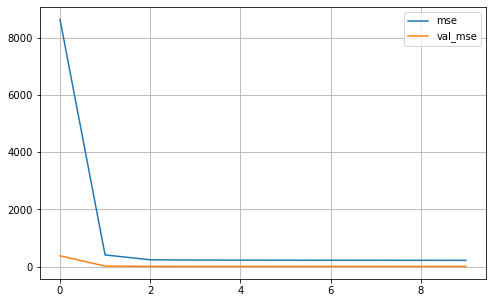

In [44]:
# mae /mape 를 이용해서 학습 그래프 그리기
hist.plot(figsize=(8, 5))
plt.grid(True) 
# grid 를 그려주면 뭔가 이뻐보인다..
# 아래 x 축은 epoch 이다. 
# 처음에 val 값이 더 좋아보이는건 mse 는 epoch 도중 계산되고 val 은 epoch 끝나고 계산되기떄문

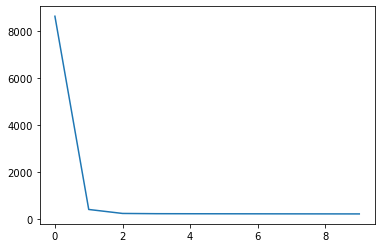

In [45]:
# loss 그리기
# 사실 loss 를 mse 로 설정해서 이렇게 그리나 마나이긴 하다..
history['loss'].plot();

### 예측 및 평가

In [46]:
model.predict(X_test)

array([[90.467735],
       [67.92232 ]], dtype=float32)

In [47]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 38ms/sample - loss: 0.1124 - mse: 0.1124 - mae: 0.2727 - mape: 0.3170


[0.1124054342508316, 0.112405434, 0.2727089, 0.31697243]

## Logistic regression

In [48]:
X = np.array([-10,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,0,0,0,0,1,1,1])

In [49]:
# 모델구성
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1, activation='sigmoid'))
# binary y 에 대한 logistic 을 하려고 하므로 출력층은 sigmoid , loss 는 binary_crossentropy , metric 은 binary_accueacy 를 해야한다.
# 모델 컴파일
sgd = keras.optimizers.SGD(lr=0.01) 
model.compile(optimizer = sgd,  # 최적화는 sgd 사용
              loss='binary_crossentropy', # binary 경우의 로지스틱이므로 binary crossentropy 사용
              metrics=['binary_accuracy']) # metrics 는 모델의 평가 기준. 
# 모델학습
fit = model.fit(X, y, 
          batch_size=1, 
          epochs=400, # 10번 학습을 시키겠다는뜻
          shuffle =False,
          verbose=0) # 학습하면서 set 을 random 하게 섞을지

### Training 과정

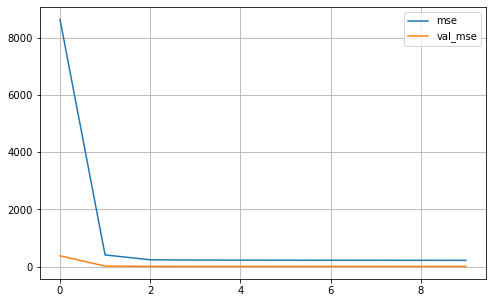

In [50]:
history = pd.DataFrame(fit.history)
hist.plot(figsize=(8, 5))
plt.grid(True) 

### 예측

In [51]:
# x 가 9.4 일떄 label 이 1일 확률은...???
model.predict([9.4])

array([[0.8240231]], dtype=float32)

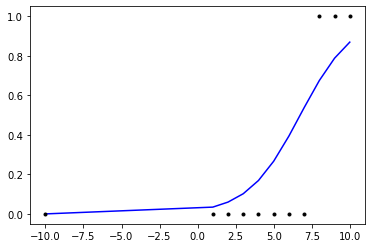

In [52]:
# X 에 대한 예측 시각화
plt.plot(X,model.predict(X),'b') # blue 그래프를 그리고싶으므로 'b'
plt.plot(X,y,'k.') # plot 을 검은점으로 하려므로 k.

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 와인 데이터셋 연습

In [54]:
from sklearn.datasets import load_wine
wine = load_wine()

In [55]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [56]:
df.shape

(178, 14)

In [57]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [58]:
# y 레이블이 3개이므로 다중분류일것이다.
pd.Series(y).value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [59]:
# 모델구성
model = keras.Sequential()
model.add(keras.layers.Dense(20,input_dim=13, activation='relu')) 
model.add(keras.layers.Dense(10,activation='relu')) # hidden layer
model.add(keras.layers.Dense(3,activation = 'softmax')) 
# multi class 분류이므로 output은 3, 여기에서는 softmax 를 써주어야한다.

# 모델 컴파일
sgd = keras.optimizers.SGD(lr=0.01) # optimizer 정의
model.compile(optimizer = sgd,  # 최적화는 sgd 사용
              loss='sparse_categorical_crossentropy',  # y lable 이 ont-hot encoding 된 상태가 아니기떄문에 sparse 사용
              metrics=['accuracy']) 
# 모델학습
fit = model.fit(X, y, 
          batch_size=10, # 데이터 셋이 있을때 몇개씩 묶어서 볼것인가
          epochs= 20, # 10번 학습을 시키겠다는뜻
          shuffle =False)

Train on 178 samples
Epoch 1/20
178/178 [==============================] - 0s 1ms/sample - loss: 534.1288 - accuracy: 0.8820
Epoch 2/20
178/178 [==============================] - 0s 73us/sample - loss: 1219.9423 - accuracy: 0.3315
Epoch 3/20
178/178 [==============================] - 0s 73us/sample - loss: 1.1011 - accuracy: 0.3315
Epoch 4/20
178/178 [==============================] - 0s 78us/sample - loss: 1.0999 - accuracy: 0.3315
Epoch 5/20
178/178 [==============================] - 0s 90us/sample - loss: 1.0989 - accuracy: 0.3315
Epoch 6/20
178/178 [==============================] - 0s 84us/sample - loss: 1.0980 - accuracy: 0.3427
Epoch 7/20
178/178 [==============================] - 0s 73us/sample - loss: 1.0971 - accuracy: 0.3989
Epoch 8/20
178/178 [==============================] - 0s 84us/sample - loss: 1.0964 - accuracy: 0.3989
Epoch 9/20
178/178 [==============================] - 0s 84us/sample - loss: 1.0957 - accuracy: 0.3989
Epoch 10/20
178/178 [===========================

In [60]:
model.summary() #모델 자체는 좀 안좋은거같다.... 데이터가 너무 적어서 그런듯? 특성도 많고 데이터도 좀 어렵구.. 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 33        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


## iris 데이터 꽃 유형분류 연습

In [61]:
from sklearn.datasets import load_iris
data = load_iris()

In [62]:
X = data.data
y = data.target

In [63]:
pd.Series(y).value_counts()

2    50
1    50
0    50
dtype: int64

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,input_dim=4,activation='relu'))
model.add(keras.layers.Dense(3,activation = 'softmax')) 
# y 카테로리가 3개이므로 output 에 3 을 넣었다.
# 다중 카테고리 분류에서는 activation 이 softmax 함수를 맨 마지막에 넣어주어야한다.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])
fit = model.fit(X,y, epochs=100, batch_size = 10,verbose = 0) 
#verbose = 0 은 학습과정 보기 싫을떄.

### 데이터 label encoder 하기

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
#label encoder
xx = np.array(['dog','cat','bird','fish'])

In [67]:
encoder = LabelEncoder()
encoder.fit(xx)
yy = encoder.transform(xx)
print(yy)

[2 1 0 3]


In [68]:
# encoder 를 거꾸로 실행
print(encoder.inverse_transform(yy))

['dog' 'cat' 'bird' 'fish']


In [69]:
# one hot encoding
from keras.utils import np_utils
YY = np_utils.to_categorical(yy)

Using TensorFlow backend.


In [70]:
print(YY)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### 데이터 one hot encoder 해서 분류하기

In [71]:
# label encoder 
# 값들이 수치형이 아니라 categorical 일때에 one hot encoder 를 위해 수치형으로 변환해야한다.
# 물론 지금은 y data 가 0,1,2 로 이쁘게 되어있지만 안 그런 경우가 더 많다.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # 객채선안
encoder.fit(y) # fit method
y = encoder.transform(y) # transform method

In [72]:
# onehot encoder
from keras.utils import np_utils
y = np_utils.to_categorical(y)

In [73]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,input_dim=4,activation='relu'))
model.add(keras.layers.Dense(3,activation = 'softmax')) 
# y 카테로리가 3개이므로 output 에 3 을 넣었다.
# 다중 카테고리 분류에서는 activation 이 softmax 함수를 맨 마지막에 넣어주어야한다.
model.compile(loss='categorical_crossentropy', # one hot encoding 되었으므로 이 loss 를 써주어야 ㅎ나다.
              optimizer= 'adam',
              metrics=['accuracy'])
fit = model.fit(X,y, epochs=100, batch_size = 10,verbose = 0) 
#verbose = 0 은 학습과정 보기 싫을떄.

## 이미지 분류기

### 데이터 전처리 및 데이터 살펴보기

In [75]:
#MNIST 데이터셋 load 하기. 이미 train/test set 이 나누어져있는 상태이기떄문에 data load 할떄에 train/test 를 모두 로드하자.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [76]:
# 훈련 세트는 60,000개의 흑백 이미지입니다. 각 이미지의 크기는 28x28 픽셀입니다:
X_train_full.shape

(60000, 28, 28)

In [77]:
# 각 픽셀의 강도는 바이트(0~255)로 표현된다.
X_train_full.dtype

dtype('uint8')

In [78]:
# 전체 훈련 세트를 valid set 과 train set 으로 나누자. (학습에 대한 추이를 보기 위함.)
# 그리고 픽셀의 강도를 0~1 의 값을 가지도록 설정하자. 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

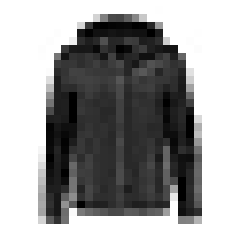

In [79]:
#맷플롯립의 `imshow()` 함수와 `'binary'` 컬러맵을 사용해 이미지를 출력할 수 있습니다:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off') # axis 를 off 해서 없애자.
plt.show()

In [80]:
# 레이블은 0에서 9까지 (uint8로 표현된) 클래스 아이디 이다.
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [81]:
# 클래스 이름은 다음과 같습니다:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [82]:
# 훈련 세트에 있는 첫 번째 이미지는 코트이다.
class_names[y_train[0]]

'Coat'

In [83]:
#검증 세트는 5,000개의 이미지를 담고 있고 테스트 세트는 10,000개의 이미지를 가집니다:
X_valid.shape

(5000, 28, 28)

In [84]:
X_test.shape

(10000, 28, 28)

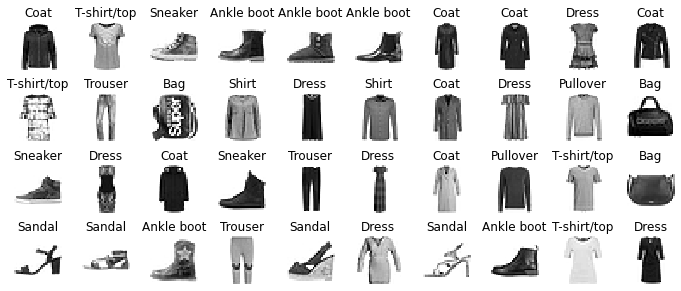

In [85]:
# 이 데이터셋에 있는 샘플 이미지를 몇 개 출력해 보자,
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 모델 구성하기

In [86]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten 층은 입력 이미지를 1d vector 로 변환한다.
model.add(keras.layers.Dense(300, activation="relu"))# 뉴런 300 개를 가지는 hidden layer 를 추가한다. # activation 은 relu 사용
model.add(keras.layers.Dense(100, activation="relu"))# 이번에는 뉴런 100개를 가지는 hidden layer 를 또 추가한다.
model.add(keras.layers.Dense(10, activation="softmax"))# 마지막 출력은 다중 lable 문제이므로 softmax 를 사용한다.
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [87]:
# flatten 이 없으면 이렇게 첫 28*28 의 x 데이터를 모두 활용하지 못하게 된다.
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(300,activation='relu',input_shape=[28,28]))
model1.add(keras.layers.Dense(100,activation='relu'))
model1.add(keras.layers.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 28, 300)           8700      
_________________________________________________________________
dense_19 (Dense)             (None, 28, 100)           30100     
_________________________________________________________________
dense_20 (Dense)             (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


In [88]:
keras.backend.clear_session() # tf.keras.backend.clear_session(). Resets all state generated by Keras.
np.random.seed(42) # 재현성을 높히기 위해 random 고정
tf.random.set_seed(42) # same as above

In [89]:
# 이런식으로도 구성할 수 있다.  나는 맨 위 방법이 층을 쌓아간다는 느낌이 더 강해서 더 좋은거같다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

### 모델 살펴보기

In [90]:
model.summary()
# 파라미터가 매우 많다. 모델이 유연하다는 의미도 있지만, 과대적합의 위험도 있다. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 레이어 살펴보기
model.layers

In [92]:
#레이어를 선택할 수 있다.
hidden1 = model.layers[1]
hidden1.name

'dense'

In [93]:
# get_wights() method 를 통해서 모든 층의 파라미터를 조사할 수 있다.
weights, biases = hidden1.get_weights() # dense 층의 경우 연결 가중치(w) 와 편향(b) 가 모두 표시된다.

In [94]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [95]:
weights.shape

(784, 300)

In [96]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [97]:
biases.shape

(300,)

In [98]:
model.compile(loss="sparse_categorical_crossentropy", 
              # y variable 이 원 핫 인코딩이 아닌 상태에서 cross entropy 를 계산하는 loss , 즉 그냥 corss entropy 라고 생각하자
              # 여기서는 정답 레이블이 0~9 인 1dim vector 이므로 sparse 를 사용
              optimizer="sgd",
              metrics=["accuracy"]) 

In [99]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # 이 떄에는 학습의 추이를 살펴보려고 val date를 추가하였다.

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.7226 - accuracy: 0.7642 - val_loss: 0.5075 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4843 - accuracy: 0.8321 - val_loss: 0.4538 - val_accuracy: 0.8486
Epoch 3/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4413 - accuracy: 0.8465 - val_loss: 0.4385 - val_accuracy: 0.8490
Epoch 4/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4128 - accuracy: 0.8549 - val_loss: 0.4163 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3926 - accuracy: 0.8617 - val_loss: 0.3817 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3770 - accuracy: 0.8667 - val_loss: 0.3729 - val_accuracy: 0.8680
Epoch 7/30
55000/55000 [==============================] -

In [100]:
history.params #모델적합이 어떻게 이루어졌는지에 대해서 간략하게 history 제공

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [101]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### training 과정

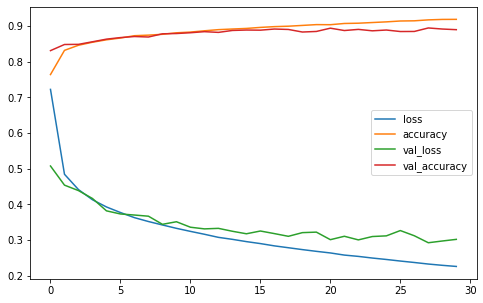

In [102]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

### 모델 평가

In [103]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3348 - accuracy: 0.8788


[0.3347936288356781, 0.8788]

### 모델 예측하기

In [104]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2) #각각 0~ 9 class 마다 각각의 확률을 모델이 추정하였다.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [205]:
# 가장 높은 클래스에만 관심이 있으면 model.predict_classes 를 쓴다.
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [206]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [207]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

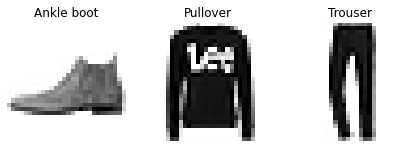

In [208]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 캘리포니아 주택 예측

In [214]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
# test size 는 default 로 0.25
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# 이 역시 valid size 는 defaualt 로 0.25

# X data scaling
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [216]:
X_train.shape

(11610, 8)

In [217]:
np.random.seed(42)
tf.random.set_seed(42)

### 모델구성

In [231]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30,activation='relu',input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(1)) #잡음이 많은 데이터의 경우, weight 가 많으면 과적합시 엄청 큰 문제가 생기므로, hidden layer 를 더 늘리지 않고 바로출력층을 쌓자.
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mse'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
evaluation = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 50us/sample - loss: 1.9093 - mse: 1.9093 - val_loss: 4.0438 - val_mse: 4.0438
Epoch 2/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.7255 - mse: 0.7255 - val_loss: 1.2611 - val_mse: 1.2611
Epoch 3/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6642 - mse: 0.6642 - val_loss: 0.6587 - val_mse: 0.6587
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6240 - mse: 0.6240 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5962 - mse: 0.5962 - val_loss: 0.6326 - val_mse: 0.6326
Epoch 6/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5712 - mse: 0.5712 - val_loss: 0.5656 - val_mse: 0.5656
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5469 - mse: 0.5469 - val_loss: 0.5

### Training 과정

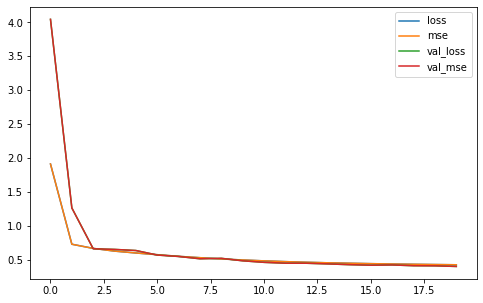

In [233]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()
# loss/mse 가 같아서 그냥 같게 나오긴 한다.

In [234]:
X_new = X_test[:3] # 3개 테이터
y_pred = model.predict(X_new)
y_pred # 그에 대한 prediction y 값

array([[0.6056558],
       [1.7686511],
       [3.3945727]], dtype=float32)